In [4]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [5]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [6]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [7]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1942058,BG,2003-07-03,28.950001,29.200001,28.920000,29.090000,19.089849,88500,Consumer Staples,Agricultural Products & Services,2003,29.100000,-0.000344,0,1.0
703195,CSX,2014-08-01,9.960000,10.000000,9.786667,9.863333,8.390083,26000400,Industrials,Rail Transportation,2014,9.973333,-0.011029,0,1.0
173473,CVS,2016-06-24,92.110001,94.519997,91.750000,93.540001,72.988579,8652700,Health Care,Health Care Services,2016,94.019997,-0.005105,0,0.0
1823597,CTRA,2008-03-17,13.060000,13.120000,12.197500,12.245000,9.100314,8866400,Energy,Oil & Gas Exploration & Production,2008,13.352500,-0.082943,0,1.0
1933580,CB,2017-11-03,148.649994,149.679993,147.759995,148.270004,129.814941,1822300,Financials,Property & Casualty Insurance,2017,149.259995,-0.006633,0,1.0


In [8]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [9]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5508, 15), (55082, 15))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

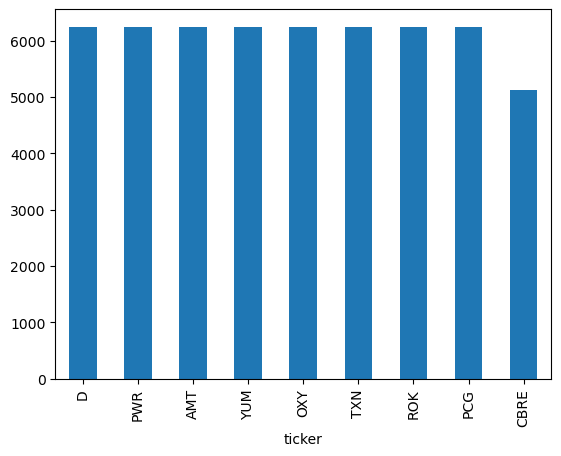

In [10]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

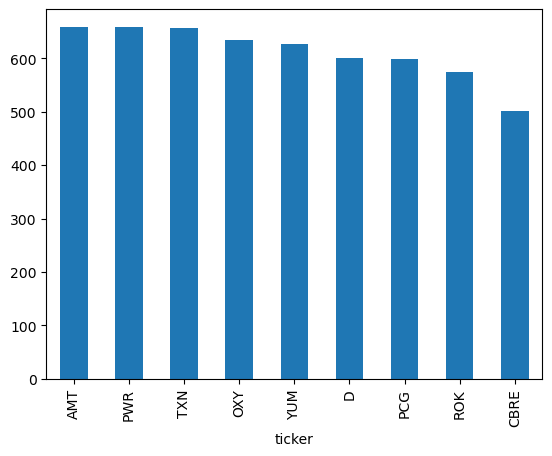

In [11]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

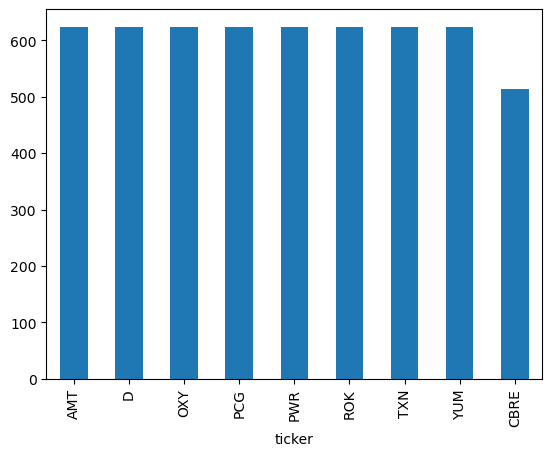

In [12]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\sijia\AppData\Local\Temp\ipykernel_12276\2932236319.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

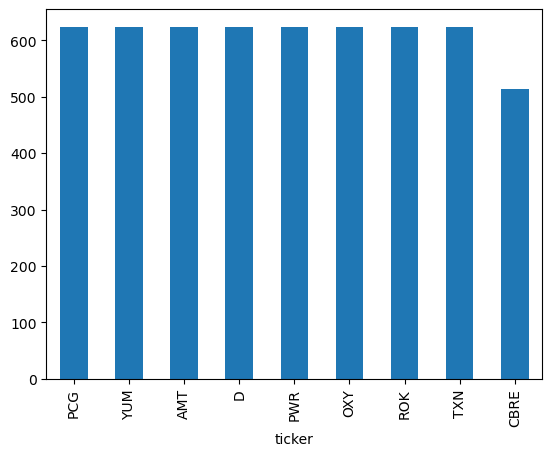

: 

In [13]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')